# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
# Merge the mouse_metadata and study_results DataFrames on the 'Mouse ID' column
merged_data = pd.merge(study_results, mouse_metadata, on="Mouse ID")

# Display the data table for preview
merged_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice.
num_mice = merged_data["Mouse ID"].nunique()

print(num_mice)


249


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merged_data[merged_data.duplicated(subset=['Mouse ID', 'Timepoint'])]

# Display the duplicate mice entries
print(duplicate_mice)


    Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
861     g989          0           45.000000                 0     Propriva   
863     g989          5           47.570392                 0     Propriva   
865     g989         10           49.880528                 0     Propriva   
867     g989         15           53.442020                 0     Propriva   
869     g989         20           54.657650                 1     Propriva   

        Sex  Age_months  Weight (g)  
861  Female          21          26  
863  Female          21          26  
865  Female          21          26  
867  Female          21          26  
869  Female          21          26  


In [4]:
# Find duplicate mice by 'Mouse ID' and 'Timepoint'
duplicate_mice = merged_data[merged_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

# Store all the data for the duplicate Mouse IDs in a separate variable called 'duplicates'
duplicates = merged_data[merged_data['Mouse ID'].isin(duplicate_mice['Mouse ID'])]

# Now, the 'duplicates' variable contains all data for the duplicate Mouse IDs


In [5]:
# Checking the number of mice to make sure that it pulled the duplicate (should be any number but 249)
num_mice = merged_data["Mouse ID"].nunique()

print(num_mice)

249


In [7]:
# Checking the number of mice to make sure that it pulled the duplicate (should be any number but 249)
num_mice = merged_data["Mouse ID"].nunique()

print(num_mice)

249


In [ ]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.


In [ ]:
# Checking the number of mice in the clean DataFrame.


## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
# Group the data by 'Drug Regimen'
regimen_group = merged_data.groupby('Drug Regimen')

# Calculate the mean, median, variance, standard deviation, and SEM for each regimen
summary_stats = regimen_group['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# Rename the columns for clarity
summary_stats = summary_stats.rename(columns={
    'mean': 'Mean Tumor Volume',
    'median': 'Median Tumor Volume',
    'var': 'Tumor Volume Variance',
    'std': 'Tumor Volume Std. Deviation',
    'sem': 'Tumor Volume SEM'
})

# Display the summary statistics table
print(summary_stats)


              Mean Tumor Volume  Median Tumor Volume  Tumor Volume Variance  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.322552            50.854632              42.351070   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   

              Tumor Volume Std. Deviation  Tumor Vo

In [7]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
# Group the data by 'Drug Regimen' and calculate summary statistics in a single line
summary_stats = merged_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    Mean_Tumor_Volume='mean',
    Median_Tumor_Volume='median',
    Tumor_Volume_Variance='var',
    Tumor_Volume_Std_Deviation='std',
    Tumor_Volume_SEM='sem'
)

# Display the summary statistics table
print(summary_stats)



              Mean_Tumor_Volume  Median_Tumor_Volume  Tumor_Volume_Variance  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.322552            50.854632              42.351070   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   

              Tumor_Volume_Std_Deviation  Tumor_Vol

## Bar and Pie Charts

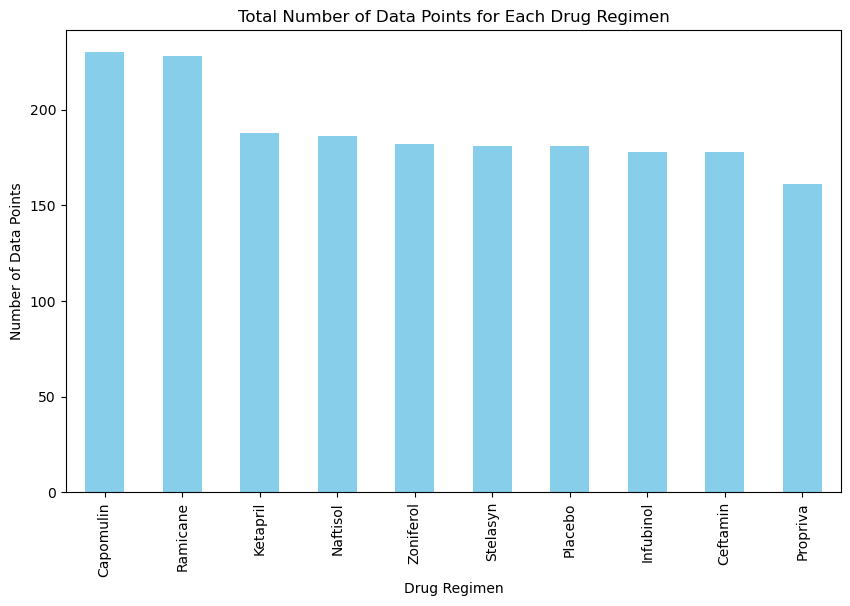

In [8]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas using DataFrame.plot() method..
import matplotlib.pyplot as plt

# Group the data by 'Drug Regimen' and count the number of rows (Mouse ID/Timepoints)
regimen_counts = merged_data['Drug Regimen'].value_counts()

# Create a bar plot
regimen_counts.plot(kind='bar', figsize=(10, 6), color='skyblue')

# Add labels and a title
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Data Points')
plt.title('Total Number of Data Points for Each Drug Regimen')

# Show the plot
plt.show()


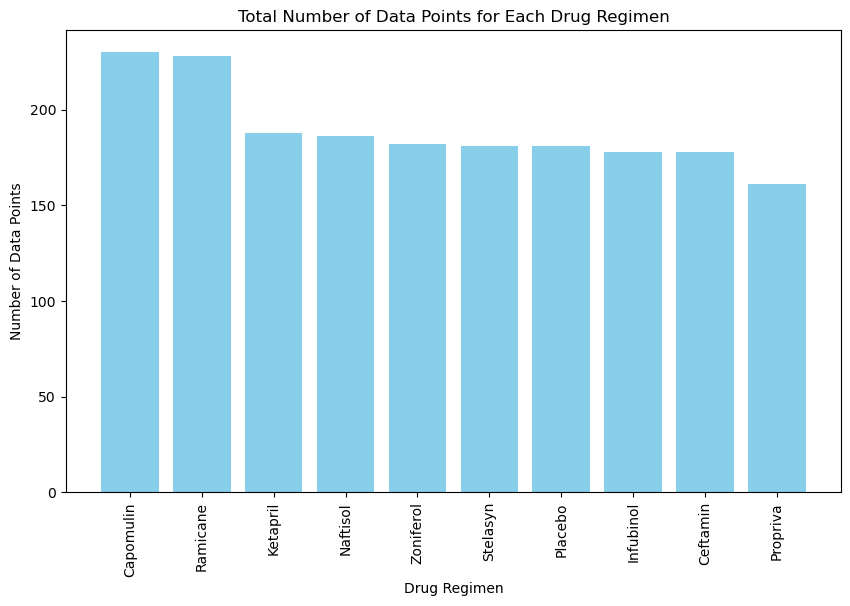

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot method.


# Group the data by 'Drug Regimen' and count the number of rows (Mouse ID/Timepoints)
regimen_counts = merged_data['Drug Regimen'].value_counts()

# Extract the regimen names and counts
regimen_names = regimen_counts.index
regimen_values = regimen_counts.values

# Create a bar plot using pyplot method
plt.figure(figsize=(10, 6))
plt.bar(regimen_names, regimen_values, color='skyblue')

# Add labels and a title x & y
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Data Points')
plt.title('Total Number of Data Points for Each Drug Regimen')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()


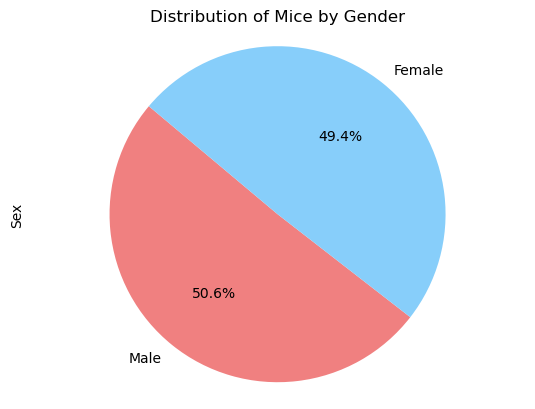

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas dataframe.plot()

# Group the data by 'Sex' and count the number of mice in each group
gender_distribution = merged_data['Sex'].value_counts()

# Create a pie plot
gender_distribution.plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'], startangle=140)

# Add a title
plt.title('Distribution of Mice by Gender')

# Display the plot
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.show()


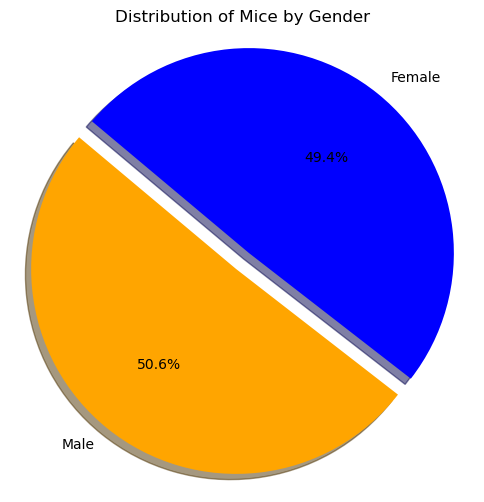

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot method

# Group the data by 'Sex' and count the number of mice in each group
gender_distribution = merged_data['Sex'].value_counts()

# Create a pie plot using pyplot
plt.figure(figsize=(6, 6))
colors = ['orange', 'blue']
labels = gender_distribution.index
sizes = gender_distribution.values
explode = (0.1, 0)  # Explode the first slice (Female)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

# Add a title
plt.title('Distribution of Mice by Gender')

# Display the plot
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


    Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0       a203         45           67.973419                 2    Infubinol   
1       a251         45           65.525743                 1    Infubinol   
3       a275         45           62.999356                 3     Ceftamin   
6       a411         45           38.407618                 1     Ramicane   
7       a444         45           43.047543                 0     Ramicane   
..       ...        ...                 ...               ...          ...   
239     y769         45           68.594745                 4     Ceftamin   
240     y793         45           31.896238                 2    Capomulin   
241     y865         45           64.729837                 3     Ceftamin   
245     z578         45           30.638696                 0     Ramicane   
246     z581         45           62.754451                 3    Infubinol   

        Sex  Age_months  Weight (g)  
0    Female          20  

In [16]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
 # Locate the rows which contain mice on each drug and get the tumor volumes
 # add subset # Determine outliers using upper and lower bounds
import matplotlib.pyplot as plt

# Create a list of data to be plotted
data_to_plot = tumor_volume_data

# Create a list of treatment regimen labels
regimen_labels = treatment_regimens

# Define the style for potential outliers
outlier_style = dict(markerfacecolor='red', marker='D')

# Create a box plot
plt.figure(figsize=(10, 6))
plt.boxplot(data_to_plot, labels=regimen_labels, flierprops=outlier_style)

# Add labels and a title
plt.xlabel('Treatment Regimen')
plt.ylabel('Final Tumor Volume (mm3)')
plt.title('Distribution of Final Tumor Volume by Treatment Regimen')

# Show the plot
plt.xticks(rotation=0)
plt.show()


NameError: name 'tumor_volume_data' is not defined

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
import matplotlib.pyplot as plt

# Create a list of data to be plotted
data_to_plot = tumor_volume_data

# Create a list of treatment regimen labels
regimen_labels = treatment_regimens

# Define the style for potential outliers
outlier_style = dict(markerfacecolor='red', marker='D')

# Create a box plot
plt.figure(figsize=(10, 6))
plt.boxplot(data_to_plot, labels=regimen_labels, flierprops=outlier_style)

# Add labels and a title
plt.xlabel('Treatment Regimen')
plt.ylabel('Final Tumor Volume (mm3)')
plt.title('Distribution of Final Tumor Volume by Treatment Regimen')

# Show the plot
plt.xticks(rotation=0)
plt.show()


NameError: name 'tumor_volume_data' is not defined

## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
